In [1]:
# Importing the required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("telecom_churn_data.csv", sep=',', encoding='ISO-8859-1')

In [3]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [5]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
#drop mobile number 
data.drop('mobile_number',axis=1,inplace=True)

In [7]:
#check for missing values
data.isna().sum()

circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
                        ... 
aon                        0
aug_vbc_3g                 0
jul_vbc_3g                 0
jun_vbc_3g                 0
sep_vbc_3g                 0
Length: 225, dtype: int64

In [8]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
188,arpu_3g_6,74.846748
176,av_rech_amt_data_6,74.846748
216,fb_user_6,74.846748
196,night_pck_user_6,74.846748
160,total_rech_data_6,74.846748
...,...,...
145,max_rech_amt_7,0.000000
144,max_rech_amt_6,0.000000
143,total_rech_amt_9,0.000000
142,total_rech_amt_8,0.000000


In [9]:
#Dropping columns where null are more than 95%
data.loc[:, data.isnull().mean() < .95]
# 1 column dropped

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
99995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,77.811,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.00
99996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,0.000,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.00
99997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,303.386,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.00


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 225 entries, circle_id to sep_vbc_3g
dtypes: float64(179), int64(34), object(12)
memory usage: 171.7+ MB


In [11]:
#DATA IMPUTATION
#We can also use MICE imputation 
#data imputation for categorical columns (fb and nigh pack users) as -1
data=data.fillna({'fb_user_6':-1,'fb_user_7':-1,'fb_user_8':-1})
data=data.fillna({'night_pck_user_6':-1,'night_pck_user_7':-1,'night_pck_user_8':-1})
#data imputation for non categorical as 0 which means no recharge happened
data=data.fillna(0)

In [12]:
#verifying imputation and null
data.isna().sum()

circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
                       ..
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
sep_vbc_3g              0
Length: 225, dtype: int64

In [13]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
0,circle_id,0.0
113,std_ic_t2o_mou_7,0.0
143,total_rech_amt_9,0.0
144,max_rech_amt_6,0.0
145,max_rech_amt_7,0.0
...,...,...
79,og_others_9,0.0
80,total_og_mou_6,0.0
81,total_og_mou_7,0.0
82,total_og_mou_8,0.0


In [14]:
## No missing values now 
##Renaming columns to get them inline with month codes
data =data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7',
                           'aug_vbc_3g': 'vbc_3g_8','sep_vbc_3g': 'vbc_3g_9'})

In [15]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               floa

In [16]:
#data.describe()
data.shape

(99999, 225)

In [17]:
#Deriving Features
data['amt_data_6'] = data.total_rech_amt_6 + data.total_rech_data_6           
data['amt_data_7'] = data.total_rech_amt_7 + data.total_rech_data_7
#  average recharge by customer in June and July
data['avg_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

#Retaining customers whose recharge amount is >= 70th percentile amount

data_filtered = data.loc[data.avg_amt_data_6_7 >= data.avg_amt_data_6_7.quantile(0.7), :]
data_filtered = data_filtered.reset_index(drop=True)
data_filtered.shape

(30019, 228)

In [18]:
data_filtered["last_date_of_month_6"] = pd.to_datetime(data_filtered["last_date_of_month_6"])
data_filtered["last_date_of_month_7"] = pd.to_datetime(data_filtered["last_date_of_month_7"])
data_filtered["last_date_of_month_8"] = pd.to_datetime(data_filtered["last_date_of_month_8"])
data_filtered["date_of_last_rech_6"] = pd.to_datetime(data_filtered["date_of_last_rech_6"])
data_filtered["date_of_last_rech_7"] = pd.to_datetime(data_filtered["date_of_last_rech_7"])
data_filtered["date_of_last_rech_8"] = pd.to_datetime(data_filtered["date_of_last_rech_8"])

#3 new columns for days since recharge.
data_filtered["days_since_recharge_6"] = data_filtered["last_date_of_month_6"] - data_filtered["date_of_last_rech_6"]
data_filtered["days_since_recharge_7"] = data_filtered["last_date_of_month_7"] - data_filtered["date_of_last_rech_7"]
data_filtered["days_since_recharge_8"] = data_filtered["last_date_of_month_8"] - data_filtered["date_of_last_rech_8"]

#converting into days
data_filtered["days_since_recharge_6"] = data_filtered["days_since_recharge_6"].dt.days
data_filtered["days_since_recharge_7"] = data_filtered["days_since_recharge_7"].dt.days
data_filtered["days_since_recharge_8"] = data_filtered["days_since_recharge_8"].dt.days

date_columns_to_be_dropped = ["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8", 
                              "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8",
                              "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8"]
data_filtered = data_filtered.drop(columns=date_columns_to_be_dropped)
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 222 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               f

In [19]:
#Identifying Churn customers
data_filtered['churn_flag'] = np.where(((data_filtered['total_ic_mou_9'] == 0.00) | (data_filtered['total_og_mou_9'] == 0.00))
                            & ((data_filtered['vol_2g_mb_9'] == 0.00) | (data_filtered['vol_3g_mb_9'] == 0.00))
                            , 1, 0)
print(data_filtered['churn_flag'].value_counts())


0    26973
1     3046
Name: churn_flag, dtype: int64


In [20]:
#CONSOLIDATION OF OTHER VALUES IS NEEDED 

In [21]:
#now that every column follows same naming patter drop features related to Churn Phase
data_filtered = data_filtered.drop(data_filtered.filter(regex='_9', axis = 1).columns, axis=1)
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 168 columns):
circle_id                int64
loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
l

In [22]:
#Plotting heatmap to get an overall picture
#plt.figure(figsize = (50, 30))
#sns.heatmap(data_filtered.corr(), annot = True, cmap="YlGnBu")
#plt.show()

In [23]:
## Heatmap is not of much help with large no of features
#Analysing further all numeric (float and int) variables in the dataset
data_numeric = data_filtered.select_dtypes(include=['float64', 'int64','int32'])
data_numeric.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,amt_data_6,amt_data_7,avg_amt_data_6_7,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn_flag
0,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,57.74,19.38,18.74,1580.0,790.0,1185.0,3,6,5,1
1,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,21.03,910.65,122.16,437.0,603.0,520.0,5,0,1,0
2,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,0.00,0.00,507.0,253.0,380.0,10,9,1,0
3,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,0.00,2.45,21.89,570.0,348.0,459.0,0,0,17,0
4,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,0.00,0.00,816.0,0.0,408.0,0,1,6,0


In [24]:
correlation = data_numeric.corr()
correlation

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,amt_data_6,amt_data_7,avg_amt_data_6_7,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn_flag
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,NaN,NaN,NaN,NaN,1.000000,0.631603,0.571027,0.291466,0.142720,0.116785,...,0.122699,0.123493,0.172676,0.941311,0.608024,0.869008,-0.040223,0.000132,0.018859,0.058438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avg_amt_data_6_7,NaN,NaN,NaN,NaN,0.869008,0.890972,0.737276,0.229281,0.227797,0.189846,...,0.140380,0.152801,0.144810,0.882371,0.892326,1.000000,-0.008149,-0.008738,-0.003386,0.009734
days_since_recharge_6,NaN,NaN,NaN,NaN,-0.040223,0.007753,0.014882,-0.021534,0.009368,0.007667,...,-0.012873,-0.010855,-0.013781,-0.059689,0.043088,-0.008149,1.000000,-0.002028,0.056297,0.035712
days_since_recharge_7,NaN,NaN,NaN,NaN,0.000132,-0.026051,-0.027658,0.013301,-0.019921,-0.013377,...,-0.015347,-0.014986,-0.008861,0.053100,-0.066131,-0.008738,-0.002028,1.000000,0.147690,0.062829
days_since_recharge_8,NaN,NaN,NaN,NaN,0.018859,-0.061927,-0.086346,-0.009344,-0.033838,-0.053130,...,-0.033237,-0.019842,-0.016792,0.030428,-0.035076,-0.003386,0.056297,0.147690,1.000000,0.132574


In [25]:
#Top 5 correlation
print (correlation['churn_flag'].sort_values(ascending=False)[:6], '\n')

churn_flag               1.000000
days_since_recharge_8    0.132574
std_og_mou_6             0.128642
std_og_t2m_mou_6         0.097622
roam_og_mou_7            0.092735
std_og_t2t_mou_6         0.092617
Name: churn_flag, dtype: float64 



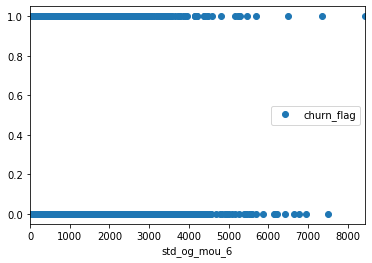

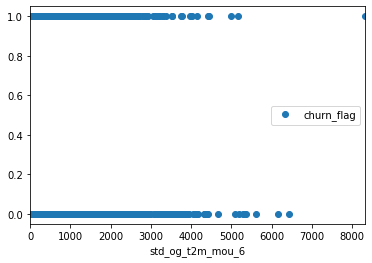

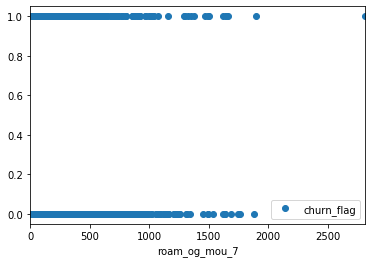

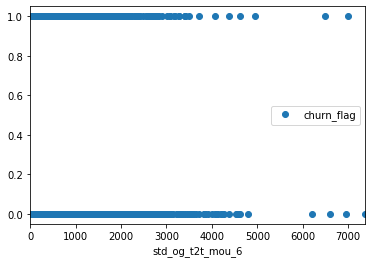

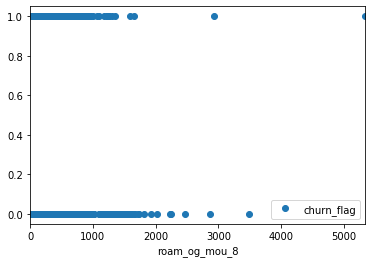

In [26]:
data_numeric.plot(y='churn_flag', x='std_og_mou_6',style ='o')
data_numeric.plot(y='churn_flag', x='std_og_t2m_mou_6',style ='o')
data_numeric.plot(y='churn_flag', x='roam_og_mou_7',style ='o')
data_numeric.plot(y='churn_flag', x='std_og_t2t_mou_6',style ='o')
data_numeric.plot(y='churn_flag', x='roam_og_mou_8',style ='o')


In [27]:
#Analysing categorical variables
#data_nonnum= data_filtered.select_dtypes(exclude=['float64', 'int64'])
#data_nonnum.describe()

In [28]:
data_filtered.shape

(30019, 168)

In [29]:
#Scaling Data
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
#X = data_filtered.copy()
# Putting feature variable to X
from sklearn.model_selection import train_test_split

X = data_filtered.drop(['churn_flag'],axis=1)

# Putting response variable to y
y = data_filtered['churn_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size=0.3, random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(21013, 167) (21013,)
(9006, 167) (9006,)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 

train_after_scaling = scaler.transform(X_train)
test_after_scaling = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(train_after_scaling, y_train)

lr = LogisticRegression(solver = 'lbfgs')



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [35]:
y_pred = logreg.predict(test_after_scaling)

In [36]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
y_pred.size

9006

In [38]:
y_test

22519    0
13786    0
10796    0
28647    0
591      0
        ..
16521    1
27496    0
17815    0
6607     0
20077    0
Name: churn_flag, Length: 9006, dtype: int32

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mean_square_err = mean_squared_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)
print(mean_square_err)
print(r_square)

In [39]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)


[[7924  156]
 [ 618  308]]


In [40]:
TP = confusion_matrix_1[1,1] # true positive 
TN = confusion_matrix_1[0,0] # true negatives
FP = confusion_matrix_1[0,1] # false positives
FN = confusion_matrix_1[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.9140572951365756
Sensitivity:  0.3326133909287257
Specificity:  0.9806930693069307
false postive rate:  0.019306930693069307
positive predictive value:  0.6637931034482759
Negative predictive value:  0.9276516038398501


In [41]:
x = train_after_scaling

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(random_state=42)

In [44]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [45]:
pca.components_

array([[-3.11488367e-19,  1.11022302e-16, -2.22044605e-16, ...,
        -4.71185278e-03, -6.56474307e-03, -1.05316434e-02],
       [-6.75224209e-20, -8.32667268e-17,  8.32667268e-17, ...,
         1.28282673e-03,  3.30546874e-04, -1.06590075e-02],
       [-3.66440456e-20, -1.11022302e-16, -6.15826834e-17, ...,
         5.57212244e-03,  1.40966768e-04, -8.18830054e-03],
       ...,
       [ 0.00000000e+00, -6.45973497e-03, -7.55441045e-02, ...,
         3.51281504e-17,  2.08166817e-17, -3.64291930e-17],
       [ 9.99999608e-01, -7.63211360e-04, -1.51578812e-05, ...,
        -9.48676901e-20, -1.05879118e-20,  4.28598671e-19],
       [-0.00000000e+00,  1.23741850e-01, -3.98490334e-01, ...,
         6.67868538e-17, -2.94902991e-17, -2.77555756e-17]])

In [46]:
pca.explained_variance_ratio_

array([1.21900205e-01, 8.45842409e-02, 6.89372602e-02, 5.23232577e-02,
       3.82140080e-02, 3.52187310e-02, 2.86299519e-02, 2.77874777e-02,
       2.39978679e-02, 2.19590460e-02, 2.10651437e-02, 2.00999651e-02,
       1.82216101e-02, 1.75919363e-02, 1.70950256e-02, 1.58500646e-02,
       1.49163256e-02, 1.43362726e-02, 1.39368499e-02, 1.31553412e-02,
       1.29275055e-02, 1.16994600e-02, 1.07579543e-02, 1.01037309e-02,
       9.73473927e-03, 9.41055014e-03, 9.07169749e-03, 8.53450165e-03,
       8.17699413e-03, 7.91299136e-03, 7.90416340e-03, 7.72489395e-03,
       7.37163511e-03, 7.12865034e-03, 6.83594738e-03, 6.33334057e-03,
       6.18413793e-03, 5.93188238e-03, 5.78334244e-03, 5.68592670e-03,
       5.61801076e-03, 5.53080916e-03, 5.29448130e-03, 5.23738610e-03,
       5.07346649e-03, 5.03947825e-03, 4.76570709e-03, 4.63165914e-03,
       4.59850062e-03, 4.52444898e-03, 4.30773334e-03, 4.21266027e-03,
       3.93453056e-03, 3.89218714e-03, 3.76426931e-03, 3.55807585e-03,
      

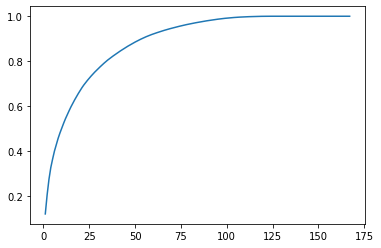

In [47]:
#75 percent of component explain close to 90 percent of variace
import matplotlib.pyplot as plt
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [48]:
#pc2 = PCA(n_components=75, random_state=42)
from sklearn.decomposition import IncrementalPCA

pcaFinal = IncrementalPCA(n_components=75)
#pcaFinal = pc2.fit_transform(x)
train_pca = pcaFinal.fit_transform(train_after_scaling)
train_pca.shape

(21013, 75)

In [49]:
#Applying selected components to the test data - 75 components
test_pca = pcaFinal.fit_transform(test_after_scaling)
test_pca.shape 


(9006, 75)

In [50]:
train_pca

array([[-2.75908298, -0.41500628,  0.18361523, ...,  0.07235438,
        -0.08024635, -0.09267099],
       [ 3.04463547, -4.67569988, -1.43930069, ...,  0.28017036,
         0.6825549 , -0.26813914],
       [-0.86931125, -2.55135302,  3.16163934, ..., -0.8697557 ,
        -1.19917053,  0.0394071 ],
       ...,
       [ 4.97397692, -4.57078854, -0.74463993, ...,  0.09981946,
        -0.82618229,  0.04779192],
       [-2.41678164,  3.22041985, -1.37217703, ...,  0.22589235,
        -0.39674904, -0.05334325],
       [-3.57740067, -0.79214185, -2.36237767, ..., -0.05105819,
        -0.02725002,  0.06018841]])

In [51]:
y_train.shape

(21013,)

In [52]:
logreg = LogisticRegression()

logreg.fit(train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_pred = logreg.predict(test_pca)


In [54]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
y_pred.size

9006

In [56]:
y_test

22519    0
13786    0
10796    0
28647    0
591      0
        ..
16521    1
27496    0
17815    0
6607     0
20077    0
Name: churn_flag, Length: 9006, dtype: int32

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mean_square_err = mean_squared_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)
print(mean_square_err)
print(r_square)

In [57]:
confusion_matrix2 = confusion_matrix(y_test, y_pred)
print(confusion_matrix2)

[[7826  254]
 [ 834   92]]


In [58]:
TP = confusion_matrix2[1,1] # true positive 
TN = confusion_matrix2[0,0] # true negatives
FP = confusion_matrix2[0,1] # false positives
FN = confusion_matrix2[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.8791916500111037
Sensitivity:  0.09935205183585313
Specificity:  0.9685643564356435
false postive rate:  0.031435643564356436
positive predictive value:  0.2658959537572254
Negative predictive value:  0.9036951501154734


In [59]:
# Decision tree after Logistic regression

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.93      0.69      0.80      8080
           1       0.17      0.55      0.26       926

    accuracy                           0.68      9006
   macro avg       0.55      0.62      0.53      9006
weighted avg       0.85      0.68      0.74      9006

[[5608 2472]
 [ 417  509]]
Acuracy Score 0.679213857428381


In [61]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.679213857428381
Sensitivity:  0.5496760259179265
Specificity:  0.694059405940594
false postive rate:  0.30594059405940593
positive predictive value:  0.1707480711170748
Negative predictive value:  0.9307883817427386
Misclassification Rate:  0.3207861425716189


In [62]:
########## lets tune hyper parameters
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}



In [63]:
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)


In [64]:

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)


In [65]:
tree.fit(train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             sco

In [66]:
y_train.shape

(21013,)

In [67]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.390671,0.030416,0.004611,0.000801,1,{'max_depth': 1},0.734237,0.718534,0.743279,0.613755,...,0.698472,0.047158,38,0.742296,0.710351,0.741761,0.629231,0.677414,0.700211,0.042798
1,0.822414,0.123227,0.006590,0.003761,2,{'max_depth': 2},0.607899,0.638829,0.608137,0.616135,...,0.620235,0.012329,39,0.607139,0.642832,0.615348,0.624948,0.618643,0.621782,0.011990
2,1.120963,0.104451,0.004995,0.000618,3,{'max_depth': 3},0.773257,0.770164,0.753985,0.679200,...,0.756103,0.041699,36,0.775550,0.754491,0.761511,0.703825,0.799893,0.759054,0.031677
3,1.423218,0.156865,0.004162,0.000302,4,{'max_depth': 4},0.705686,0.759933,0.748751,0.752023,...,0.746919,0.021689,37,0.707496,0.766508,0.759786,0.778240,0.758372,0.754080,0.024328
4,1.824450,0.208852,0.004598,0.000479,5,{'max_depth': 5},0.768499,0.781347,0.761837,0.755593,...,0.770095,0.010764,34,0.777751,0.797680,0.780547,0.781988,0.790792,0.785752,0.007388


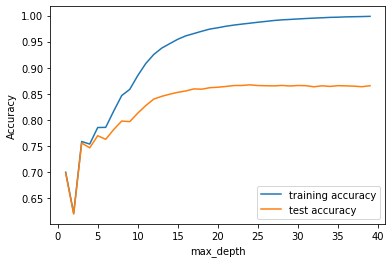

In [68]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# seems 15 or 20 Max depth

In [69]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [70]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.378243,0.839500,0.004503,0.002696,5,{'min_samples_leaf': 5},0.837497,0.839638,0.832739,0.830319,...,0.835245,0.003333,1,0.943248,0.938846,0.939262,0.938433,0.933555,0.938669,0.003084
1,2.221936,0.655654,0.003573,0.001332,25,{'min_samples_leaf': 25},0.774923,0.773019,0.781347,0.783198,...,0.781040,0.006969,2,0.829685,0.827305,0.827841,0.844328,0.845994,0.835030,0.008326
2,1.192409,0.035366,0.002599,0.000481,45,{'min_samples_leaf': 45},0.760409,0.762075,0.749941,0.767968,...,0.759149,0.006117,5,0.802201,0.797620,0.788043,0.819107,0.796264,0.800647,0.010300
3,1.242192,0.173182,0.003392,0.000798,65,{'min_samples_leaf': 65},0.762788,0.767547,0.753271,0.754879,...,0.757864,0.006284,7,0.793873,0.799941,0.787567,0.793231,0.782107,0.791344,0.006057
4,1.216801,0.119967,0.002402,0.000482,85,{'min_samples_leaf': 85},0.782298,0.760885,0.751844,0.756307,...,0.759149,0.012788,5,0.802439,0.779655,0.783403,0.790078,0.770091,0.785133,0.010800


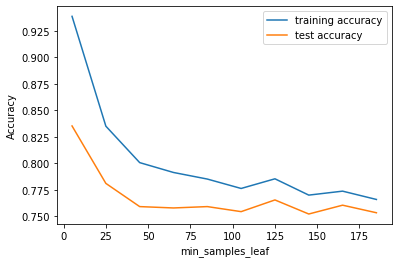

In [71]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 5 to 150

In [72]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [73]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.847714,0.954454,0.004194,0.002915,5,{'min_samples_split': 5},0.861527,0.863669,0.865096,0.866016,...,0.864322,0.001592,1,0.994468,0.995241,0.995419,0.995479,0.995479,0.995217,0.000385
1,1.648721,0.235460,0.002207,0.000394,25,{'min_samples_split': 25},0.820842,0.826790,0.821080,0.824369,...,0.823919,0.002557,2,0.933432,0.929863,0.931172,0.936173,0.934626,0.933053,0.002283
2,1.548596,0.168326,0.002195,0.000399,45,{'min_samples_split': 45},0.804901,0.797764,0.799191,0.802475,...,0.801504,0.002633,3,0.896907,0.886258,0.888638,0.899530,0.896080,0.893483,0.005113
3,1.604339,0.253168,0.002202,0.000395,65,{'min_samples_split': 65},0.784916,0.778254,0.782060,0.793908,...,0.784372,0.005229,4,0.866627,0.852052,0.859607,0.875022,0.859497,0.862561,0.007751
4,1.459083,0.122490,0.002992,0.001545,85,{'min_samples_split': 85},0.773733,0.753747,0.760171,0.777725,...,0.767430,0.008995,5,0.841225,0.819334,0.826056,0.849622,0.836893,0.834626,0.010778


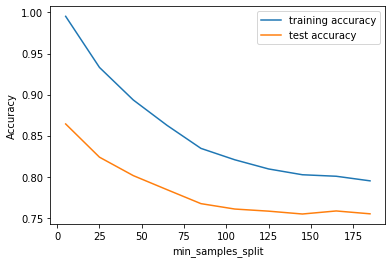

In [75]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 25

In [78]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 25.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                  

In [79]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.709963,0.674792,0.004615,0.002710,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.812515,0.797526,0.75803,0.738220,0.781057,0.777471,0.026690,24
1,4.697736,0.406044,0.005721,0.001017,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.812515,0.797526,0.75803,0.738220,0.781057,0.777471,0.026690,24
2,4.184248,0.068789,0.009443,0.005796,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.811801,0.797526,0.75803,0.738220,0.781057,0.777328,0.026503,26
3,4.214979,0.076152,0.007568,0.002788,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.811325,0.797526,0.75803,0.738220,0.781057,0.777233,0.026380,27
4,4.402309,0.315221,0.005632,0.000497,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.811325,0.797526,0.75803,0.736792,0.781057,0.776948,0.026805,41


In [81]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8046447437300719
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [83]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [84]:
y_pred_default = clf_gini.predict(test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6327, 1753],
       [ 625,  301]], dtype=int64)

In [85]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.3250539956803456
Specificity:  0.7830445544554455
false postive rate:  0.21695544554455445
positive predictive value:  0.14654333008763387
Negative predictive value:  0.9100978135788262
Misclassification Rate:  0.26404619142793695


In [86]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(test_pca)

In [87]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8079,    1],
       [ 926,    0]], dtype=int64)

In [88]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.0
Specificity:  0.9998762376237624
false postive rate:  0.00012376237623762376
positive predictive value:  0.0
Negative predictive value:  0.8971682398667407
Misclassification Rate:  0.10293137908061292


In [95]:
#Lets do some hyper parameter tuning  for RF

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf_with_pca.fit(train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [96]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.352457,0.008166,0.009574,0.001850,2,{'max_depth': 2},0.760885,0.776826,0.773257,0.751071,...,0.767430,0.009916,4,0.762641,0.784295,0.782035,0.758254,0.771459,0.771737,0.010280
1,1.051586,0.043274,0.012966,0.005046,7,{'max_depth': 7},0.864621,0.852248,0.848680,0.841266,...,0.854281,0.009143,3,0.886615,0.880428,0.878227,0.884540,0.881209,0.882204,0.002996
2,1.245867,0.031147,0.010372,0.001850,12,{'max_depth': 12},0.902926,0.896265,0.897454,0.889100,...,0.897968,0.005365,2,0.958596,0.956692,0.957585,0.956992,0.961156,0.958204,0.001613
3,1.379510,0.067614,0.009375,0.002326,17,{'max_depth': 17},0.909826,0.904116,0.902451,0.896478,...,0.904488,0.004954,1,0.978346,0.975788,0.978703,0.979061,0.976325,0.977645,0.001327


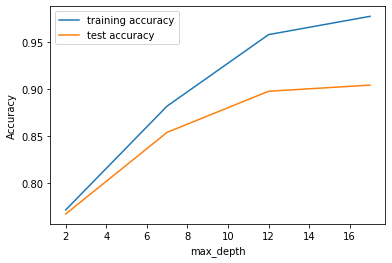

In [97]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 10 to 12

In [ ]:
# more hyper parameters needed to be tuned for RF

In [80]:
# Next will be to do Random forest with PCA
# do all hyper parameters - Gaurav

In [ ]:
# after that compare the accuracies of the models -gaurav

In [ ]:
#then do all features whichever model has highest accuracy - Gaurav
# then select which features may need to be looked into?
